<a href="https://colab.research.google.com/github/ahmed-u-khan/stock_analysis/blob/main/expected_price_changes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTING AND SETTING UP CONFIGS

In [17]:
# prompt: how do i import data from bigquery?

from google.colab import auth
auth.authenticate_user()
print('Authenticated')

import pandas as pd
import pandas_gbq
import matplotlib.pyplot as plt

pd.set_option('display.width', 400)

%config InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline

project_id = 'first-project-262802' # Replace with your project ID
dataset_id = 'stock_analysis' # Replace with your dataset ID
table_id = 'stock_analysis' # Replace with your table ID

Authenticated


##**FNGU**

###*QUERY AND DATA*

In [21]:
symbol_one = 'FNGU'

query = f"""

    SELECT

      symbol
      , date
      -- , price_diff_of_high_to_close_of_previous_day
      -- , price_diff_pct_of_high_to_close_of_previous_day
      -- , price_diff_of_low_to_close_of_previous_day
      -- , price_diff_pct_of_low_to_close_of_previous_day
      , price_diff_of_close_to_close_of_previous_day
      , round(price_diff_of_close_to_close_of_previous_day,22) as price_diff_of_close_to_close_of_previous_day_rounded
      , price_diff_pct_of_close_to_close_of_previous_day
      , round(price_diff_pct_of_close_to_close_of_previous_day,1) as price_diff_pct_of_close_to_close_of_previous_day_rounded

    FROM `{project_id}.{dataset_id}.{table_id}`
    WHERE symbol = '{symbol_one}'

    ORDER BY symbol, date

"""

# df = pd.read_gbq(query, project_id=project_id) ### pd.read_gbq is about to be depracated
df = pandas_gbq.read_gbq(query, project_id=project_id)

print(df.head(10))
# print(df.to_string())


Downloading: 100%|██████████|
  symbol        date  price_diff_of_close_to_close_of_previous_day  price_diff_of_close_to_close_of_previous_day_rounded  price_diff_pct_of_close_to_close_of_previous_day  price_diff_pct_of_close_to_close_of_previous_day_rounded
0   FNGU  2018-01-23                                           NaN                                                NaN                                                  NaN                                                NaN       
1   FNGU  2018-01-24                                     -0.110001                                          -0.110001                                                -0.21                                               -0.2       
2   FNGU  2018-01-25                                     -0.039997                                          -0.039997                                                -0.07                                               -0.1       
3   FNGU  2018-01-26                                  

###*ANALYSIS*

#### CLOSE TO CLOSE PRICE DIFF

,price_diff_of_close_to_close_of_previous_day_rounded
count,1743.00
mean,0.35
std,11.18
min,-88.27
25%,-2.95
50%,0.50
75%,4.35
max,51.82


array([[<Axes: title={'center': 'price_diff_of_close_to_close_of_previous_day_rounded'}>]],
      dtype=object)

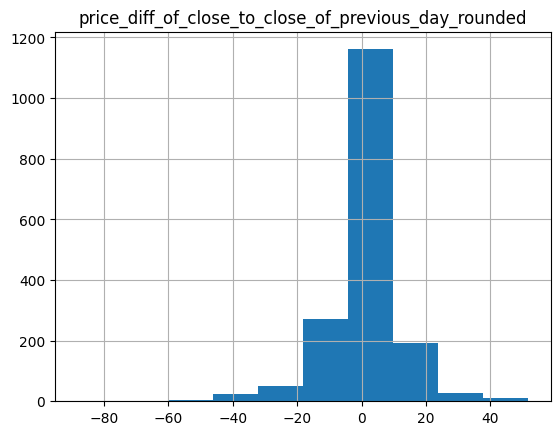

In [24]:

df['price_diff_of_close_to_close_of_previous_day_rounded'].describe().apply("{0:.2f}".format)

df.hist(column='price_diff_of_close_to_close_of_previous_day_rounded')

#### CLOSE TO CLOSE PRICE DIFF %

,price_diff_pct_of_close_to_close_of_previous_day_rounded
count,1743.00
mean,0.31
std,5.80
min,-29.20
25%,-2.70
50%,0.50
75%,3.80
max,31.10


array([[<Axes: title={'center': 'price_diff_pct_of_close_to_close_of_previous_day_rounded'}>]],
      dtype=object)

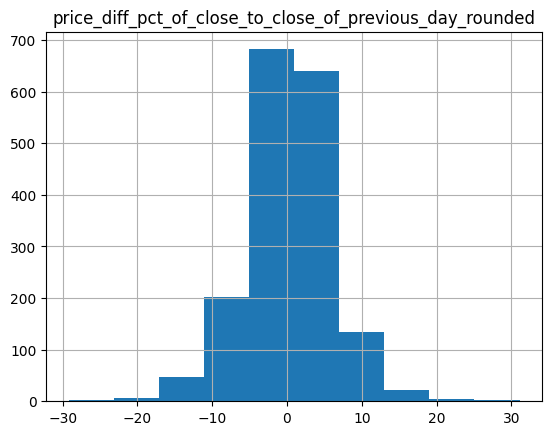

In [23]:
df['price_diff_pct_of_close_to_close_of_previous_day_rounded'].describe().apply("{0:.2f}".format)

df.hist(column='price_diff_pct_of_close_to_close_of_previous_day_rounded')